In [6]:
#-----------------------------------------------------------------------
# piecewise_E[vv1+vv2].py
# Author: modified from Rebecca Barber by Emily Ryu
# 
# calculate the expected max virtual value of the favorite item +
# max virtual value of the non-favorite item for n bidders. 
# relevant flow: the pure diagonal one in the continuous setting
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [7]:
# draw w and beta
def draw_alpha_beta():
    alpha = random()
    beta = random() * 2
    return alpha, beta

# Flow Simulation

In [8]:
def calc_vv_sum(n):
    # calc vvs for each bidder
    vv1s = []
    vv2s = []
    
    for i in range(n):
        alpha, beta = draw_alpha_beta()
        
        if beta < 1:
            vv1 = -2 * (alpha - 2*beta + 1) / (beta * (2 - alpha * beta - beta)**2)
            vv2 = 2 * (alpha + 2 * beta - 1) / (beta * (2 + alpha*beta - beta)**2)
            # get rid of negative vv by setting equal to zero
            if vv1 < 0:
                vv1 = 0
            if vv2 < 0:
                vv2 = 0
        else:   # vv1, vv2 always >= 0
            vv1 = 2 / ((alpha - 1) * (beta - 2)**3)
            vv2 = -2 / ((alpha + 1) * (beta - 2)**3)
        
        vv1s.append(vv1)
        vv2s.append(vv2)
    
    return max(vv1s) + max(vv2s)

# Variable Updates

In [9]:
num_trials = 1000 #100000
min_bidders = 100
max_bidders = 500
bidder_step = 10

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [16]:
avg_vv_sums = []

print('number of bidders:')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print(n, end = "")

    # run num_trials for each # of bidders so we can 
    # take the average
    all_vv_sums = []
    for i in range(num_trials):
        vv_sum = calc_vv_sum(n)
        all_vv_sums.append(vv_sum)  
    mean_vv_sum = mean(all_vv_sums)
    avg_vv_sums.append(mean_vv_sum)
    print(':', mean_vv_sum)

# save all of the data
csv_file = './data/piecewise_E[vv1+vv2]_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg (vv_1 + vv2)'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_vv_sum = avg_vv_sums[i]
    df = df.append({'num bidders': n, 'avg (vv_1 + vv2)': avg_vv_sum}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:
100: 12370169146569.629
110: 3027325897613754.5
120: 1378533241519.4119
130: 5080358415022.71
140: 23332984932200.316
150: 1.8295980856859684e+16
160: 706759201439.6144
170: 8430482004149.53
180: 742854102195.7817
190: 13507809716716.178
200: 364261780644.31525
210: 3821683364300.2915
220: 39907460495627.17
230: 27490822376425.56
240: 51572029719959.69
250: 3758295734515.8975
260: 310932901878297.3
270: 4559352393064422.0
280: 15762697268835.068
290: 8.32826677139282e+16
300: 99957010981933.05
310: 81993808842578.73
320: 6.380496430894869e+16
330: 5784883771434584.0
340: 5.439459096905714e+20
350: 6302850717707069.0
360: 903186958905176.5
370: 3640234750741700.0
380: 125675430880446.78
390: 113899600149799.6
400: 838604972401933.0
410: 959538378948840.4
420: 97147211496122.12
430: 174939883000426.4
440: 906318342394938.5
450: 20307213124667.188
460: 13701211803505.463
470: 1181228881931335.8
480: 633905579776602.9
490: 879862055595096.2
500: 399212099251039.0


# Plotting

<Figure size 648x360 with 0 Axes>

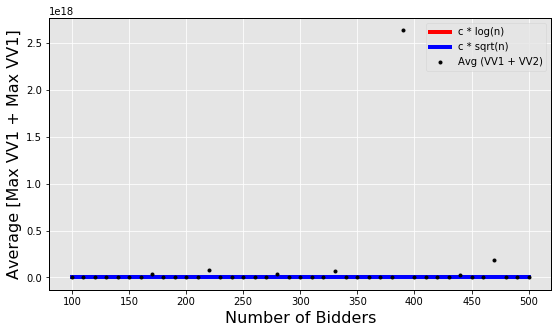

In [11]:
# plot the results
log_bench = [3.2*np.log(n) for n in num_bidders]
sqrt_bench = [1.5*np.sqrt(n) for n in num_bidders]

figure_name = './figures/piecewise_E[vv1+vv2]_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.png'

plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_vv_sums,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c * log(n)', 'c * sqrt(n)', 'Avg (VV1 + VV2)'])
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Average [Max VV1 + Max VV1]', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')

In [12]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_vv_sums, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_vv_sums, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 1.2336206882424898e+17 
b = -6.170188078493724e+17 
error = 6.645373324301519e+36

sqrt fit: 
a = 1.5537634916881536e+16 
b = -1.8806492280377238e+17 
error = 6.645606586457081e+36
